
### Vaccine Network Delivery Problem
Submitted by: Somya Kukreja


# Import Packages and Modules
In this section, we installed the necessary packages and imported the modules needed.

In [ ]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 

CPU times: user 352 ms, sys: 89.5 ms, total: 441 ms
Wall time: 1min 11s


In [ ]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
from math import radians
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import scipy.stats as st

In [ ]:
# Prepare the environment for solver
import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
    
from pyomo.environ import *

     |████████████████████████████████| 9.4MB 3.7MB/s 
     |████████████████████████████████| 256kB 48.0MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 163kB 58.8MB/s 
Selecting previously unselected package coinor-libcoinutils3v5.
(Reading database ... 144970 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.10.14+repack1-1_amd64.deb ...
Unpacking coinor-libcoinutils3v5 (2.10.14+repack1-1) ...
Selecting previously unselected package coinor-libosi1v5.
Preparing to unpack .../1-coinor-libosi1v5_0.107.9+repack1-1_amd64.deb ...
Unpacking coinor-libosi1v5 (0.107.9+repack1-1) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.16.11+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.16.11+repack1-1) ...
Selecting previously unselected package coinor-libcgl1.
Preparing to unpack .../3-coinor-libcgl1_0.59.10+repack1-1_amd64.deb ...
Unpacking coi

# EDA and Data Preprocessing


* We Plotted the towns and the three hospitals on the map to see how well those towns were spread out in a county. As a result, we know that those chosen towns were not located together on the map and were spread out. The difference in geograhic locations(spread amongst towns) among towns resulted in interesting insights and solutions to deliver the vaccines of COVID-19.
* By using a mathematical function, i.e., radius to convert the lat/lon differences between two towns into the numerical distance, we prefered to use kilometer as our measurement unit for solving the network and minimum flow problem. 

**Details of the 10 chosen towns:**

$[-73.10281771, 41.92188246] $ Confirmed case $77$ `Winchester`

$[-73.31454071, 41.65229122] $ Confirmed case $31$ `Washington`

$[-73.1280758, 41.83494029]$ Confirmed case $695$ `Torrington`

$[-73.43761718, 41.85750436]$ Confirmed case $17$ `Sharon`

$[-73.42565058, 41.98601888]$ Confirmed case $28$ `Salisbury`

$[-73.30056857, 41.5536298]$ Confirmed case $18$ `Roxbury`

$[-73.026278, 41.66415841]$ Confirmed case $99$ `Plymouth`

$[-73.19622419, 41.98014496]$ Confirmed case $18$ `Norfolk`

$[-73.20799259, 41.68979758]$  Confirmed case $17$ `Morris`

$[-73.32983397, 41.84748961]$ Confirmed case $9$ `Cornwall` 

From the information provided above, we know that the confirmed cases of few towns that are picked are low and few are high. The distribution of confirmed cases among 10 towns is reasonably diverse for us to build the delivery network of the vaccine. The geographical location is also spread out appropriately. As a result, we can cover vast ranges of Litchfield county, once the vaccine of COVID-19 is out for circulation.

## Geographical locations of 10 towns from Litchfield county on the map

By using longitude and latitudes of 10 towns, we can plot these towns on the map to visulize the geographical locations. These towns are represented by the white dots on the map.

Similarly, we have also plotted the three hospitals on the map which are represented by the red dots on the map.

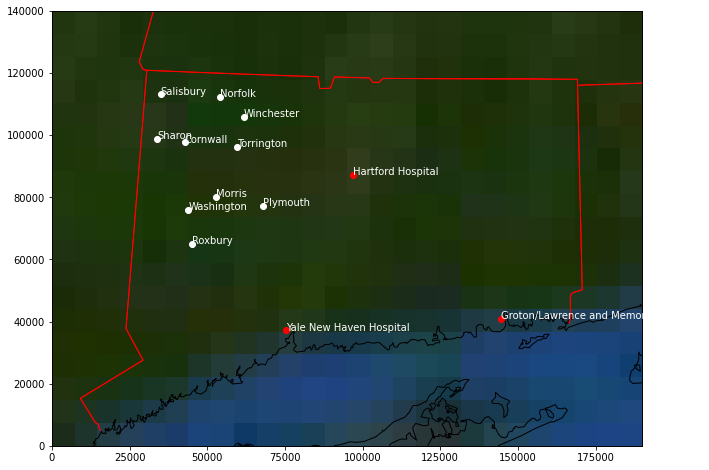

In [ ]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
fig = plt.figure(figsize=(12,8))
m = Basemap( projection='lcc', resolution='h', 
            lat_0=41.6, lon_0=-72.7,
            width=190000, height=1.4E5, suppress_ticks=False)

# Hospital location
# Hartford = 41.7545445,  -72.6778707, New Heaven = 41.3044, -72.9356, Groton = 41.3363, -72.1046
latitudes_y = [41.7545445, 41.3044, 41.3363]
longitude_x = [-72.6778707, -72.9356, -72.1046]
x,y = m(longitude_x, latitudes_y)
m.plot(x,y,'ro')
plt.text(x[0],y[0], 'Hartford Hospital', fontsize=10,  color='white')
plt.text(x[1],y[1], 'Yale New Haven Hospital', fontsize=10,  color='white')
plt.text(x[2],y[2], 'Groton/Lawrence and Memorial Hospital', fontsize=10,  color='white')


#Counties in CT
lat_y_county = [41.55396298,41.92188246,41.85750436,41.66415841,41.98014496,41.98601888,41.65229122,41.84748961,41.68979758,41.83494029]
lon_x_county = [-73.30056857,-73.10281771,-73.43761718,-73.026278,-73.19622419,-73.42565058,-73.31454071,-73.32983397,-73.20799259,-73.1280758]
xCounty,yCounty =  m(lon_x_county, lat_y_county)
m.plot(xCounty,yCounty,'wo')

plt.text(xCounty[0],yCounty[0], 'Roxbury', fontsize=10,  color='white')
plt.text(xCounty[1],yCounty[1], 'Winchester', fontsize=10,  color='white')
plt.text(xCounty[2],yCounty[2], 'Sharon', fontsize=10,  color='white')
plt.text(xCounty[3],yCounty[3], 'Plymouth', fontsize=10,  color='white')
plt.text(xCounty[4],yCounty[4], 'Norfolk', fontsize=10,  color='white')
plt.text(xCounty[5],yCounty[5], 'Salisbury', fontsize=10,  color='white')
plt.text(xCounty[6],yCounty[6], 'Washington', fontsize=10,  color='white')
plt.text(xCounty[7],yCounty[7], 'Cornwall', fontsize=10,  color='white')
plt.text(xCounty[8],yCounty[8], 'Morris', fontsize=10,  color='white')
plt.text(xCounty[9],yCounty[9], 'Torrington', fontsize=10,  color='white')

m.drawcoastlines()
m.drawcountries(linewidth=2.0, linestyle='solid',color='blue')
m.drawstates(linewidth=1.0, linestyle='solid',color='red')
#m.fillcontinents(color='white',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.bluemarble()
#m.etopo()

#m.readshapefile('/content/drive/My Drive/Colab Notebooks/Data/st99_d00', name='states', drawbounds=True)
#m.states_info
m.drawmapboundary(fill_color='aqua')
#plt.title("Miller Cylindrical Projection")
plt.show()

**Take away from the Map:**

From the map, we have visualized the geographical location of all towns and hospitals. For the picked towns, we can observe that their geographical locations are well spread on the map. The delivery of the vaccines to these 10 towns can cover each area on the map, which makes our solution of delivering vaccine reasonable and practical in the real world.

## Pair-wise distance between different spots

*Assumption:*
*  Couriers do not have to take a detour from one city to another, which means direct distance would be the distance between two towns.
*  kilometer would be the measurement unit for us to calculate the distance between towns and hospitals, and also to solve the vaccine delivery problem.
* The delivery path that we have considered is from three hospitals to each town respectively.

We convert the Lat/Lon into the radius and use a mathematical function to calculate the pair wise distance between each hospital and each town.

In [ ]:
# Lat and Lon of the three hospitals
# Hartford = 41.7545445, -72.6778707, New Haven = 41.3044, -72.9356, Groton = 41.3363, -72.1046
hartford = [41.7545445, 72.6778707]
newhaven = [41.3044, 72.9356]
groton = [41.3363, 72.1046]
hartford_in_radians = [radians(_) for _ in hartford]
newhaven_in_radians = [radians(_) for _ in newhaven]
groton_in_radians = [radians(_) for _ in groton]

# Lat and Lon of 10 towns
t = [41.55396298,73.30056857] #Roxbury 
t1 = [41.92188246,73.10281771] #Winchester 
t2 = [41.85750436,73.43761718] #Sharon 
t3 = [41.66415841,73.026278] #Plymouth 
t4 = [41.98014496,73.19622419] #Norfolk 
t5 = [41.98601888,73.42565058] #Salisbury 
t6 = [41.65229122,73.31454071] #Washington 
t7 = [41.84748961,73.32983397] #Cornwall 
t8 = [41.68979758,73.20799259] #Morris 
t9 = [41.83494029,73.1280758] #Torrington 
t_in_radians = [radians(_) for _ in t]
t1_in_radians = [radians(_) for _ in t1]
t2_in_radians = [radians(_) for _ in t2]
t3_in_radians = [radians(_) for _ in t3]
t4_in_radians = [radians(_) for _ in t4]
t5_in_radians = [radians(_) for _ in t5]
t6_in_radians = [radians(_) for _ in t6]
t7_in_radians = [radians(_) for _ in t7]
t8_in_radians = [radians(_) for _ in t8]
t9_in_radians = [radians(_) for _ in t9]

# Pair-wise distance
result1 = haversine_distances([hartford_in_radians, t_in_radians,t1_in_radians,t2_in_radians,
                              t3_in_radians,t4_in_radians,t5_in_radians,t6_in_radians,t7_in_radians,t8_in_radians,t9_in_radians])
result2 = haversine_distances([newhaven_in_radians,t_in_radians,t1_in_radians,t2_in_radians,
                              t3_in_radians,t4_in_radians,t5_in_radians,t6_in_radians,t7_in_radians,t8_in_radians,t9_in_radians])
result3 = haversine_distances([groton_in_radians,t_in_radians,t1_in_radians,t2_in_radians,
                              t3_in_radians,t4_in_radians,t5_in_radians,t6_in_radians,t7_in_radians,t8_in_radians,t9_in_radians])

For easy illustration we decided to drop rows and columns, the unnecessary distance between 13 locations such as hospital to hospital and town to town to keep the matrix clean,simple and for efficient working of the model. Because of the long decimal points of each distance between hospital and town, we tried to have low decimal digits by rounding off.

After dropping unnecessary rows and columns, we concatenated those pair-wise distances into one table and renamed the index and columns' names to the matched hospitals' and cities' names to get an understandable matrix.

In [ ]:
# Rename and Restrcuture the Matrix
a = pd.DataFrame(np.round(result1 * 6371000/1000, decimals=3), index=['Hartford Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], columns = ['Hartford Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '] )
a_1 = a.drop(['Roxbury','Winchester', 'Sharon','Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], axis=0)

b = pd.DataFrame(np.round(result2 * 6371000/1000, decimals=3), index=['Yale New Haven Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], columns = ['Yale New Haven Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '])
b_1 = b.drop(['Roxbury','Winchester', 'Sharon','Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], axis=0)

c = pd.DataFrame(np.round(result3 * 6371000/1000, decimals=3), index=['Groton/Lawrence and Memorial Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], columns = ['Groton/Lawrence and Memorial Hospital', 'Roxbury','Winchester', 'Sharon',
                 'Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '])
c_1 = c.drop(['Roxbury','Winchester', 'Sharon','Plymouth','Norfolk','Salisbury','Washington','Cornwall ','Morris ','Torrington '], axis=0)


final_matrix = pd.DataFrame(np.concatenate((b_1, a_1, c_1)))
final_matrix.drop([0], axis=1, inplace=True)

final_matrix.rename(columns={1:'Roxbury', 2:'Winchester', 3:'Sharon',
                    4:'Plymouth',5:'Norfolk',6:'Salisbury',7:'Washington',8:'Cornwall ',9:'Morris ',10:'Torrington '}, inplace=True)
final_matrix.rename(index={0:"Yale New Haven Hospital" , 1: "Hartford Hospital", 2:'Groton/Lawrence and Memorial Hospital'}, inplace=True)
final_matrix

,Roxbury,Winchester,Sharon,Plymouth,Norfolk,Salisbury,Washington,Cornwall,Morris,Torrington
Yale New Haven Hospital,41.182,70.054,74.337,40.710,78.198,86.038,49.930,68.718,48.488,61.128
Hartford Hospital,56.337,39.819,64.004,30.618,49.716,67.054,54.064,55.022,44.582,38.378
Groton/Lawrence and Memorial Hospital,102.580,105.465,125.082,84.974,115.540,131.386,106.722,116.673,99.927,101.587


## Network Flow Diagram

By analyzing the network flow diagram, we can get a clear definition of the problem we face. The diagram helps us to see how to build supply nodes, transportation nodes, and demand nodes.

(Let H be Hospitals:
$H_1$  `Yale New Haven Hospital` $H_2$ `Hartford Hospital`  $H_3$ `Groton/Lawrence and Memorial Hospital`

*Let T be the Towns*:

$T_1$ `Roxbury`  $T_2$ `Winchester`  $T_3$ `Sharon`  $T_4$ `Plymouth` $T_5$ `Norfolk`  

$T_6$ `Salisbury`  $T_7$ `Washington`  $T_8$ `Cornwall`  $T_9$ `Morris`  $T_10$ `Torrington`

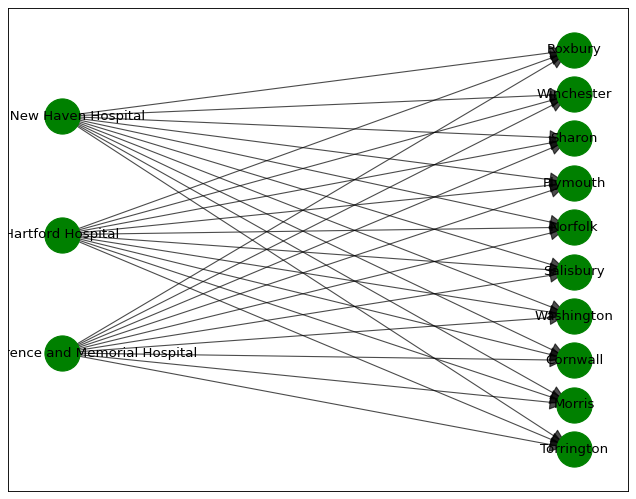

In [ ]:
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

G = nx.DiGraph()
G.add_edges_from(
    [('H', 'A'), ('H', 'B'), ('H', 'C'),('H', 'D'),('H', 'E'),('H', 'F'),('H', 'G'),('H', 'h'), ('H', 'I'), ('H', 'J'),
     ('N', 'A'), ('N', 'B'), ('N', 'C'),('N', 'D'),('N', 'E'),('N', 'F'),('N', 'G'),('N', 'h'), ('N', 'I'), ('N', 'J'),
     ('L', 'A'), ('L', 'B'), ('L', 'C'),('L', 'D'),('L', 'E'),('L', 'F'),('L', 'G'),('L', 'h'), ('L', 'I'), ('L', 'J')])

labels = {'A':'Roxbury', 'B':'Winchester', 'C':'Sharon', 'D':'Plymouth','E':'Norfolk','F':'Salisbury',
          'G':'Washington','h':'Cornwall','I':'Morris','J':'Torrington',
          'H':'Yale New Haven Hospital','N':'Hartford Hospital','L':'Groton/Lawrence and Memorial Hospital'}

# Need to create a layout when doing
# separate calls to draw nodes and edges
fixed_positions = {'H':(1, 23.5),'N':(1, 15.5),'L':(1, 7.5) ,'A':(5, 28),'B':(5, 25),'C':(5, 22),
                   'D':(5, 19), 'E':(5, 16),'F':(5, 13),'G':(5, 10), 'h':(5, 7), 'I':(5, 4), 'J':(5,1)} 
fixed_nodes = fixed_positions.keys() 

pos = nx.spring_layout(G, k=2, pos=fixed_positions  ,fixed=fixed_nodes, iterations=100, threshold=0.0001, weight='weight', scale=1, center= [0,100], dim=2)
nx.draw_networkx_labels(G, pos, labels=labels)
nx.draw_networkx_nodes(G, pos=fixed_positions,  node_size = 1000, node_color= '#008000', )
nx.draw_networkx_edges(G, pos, arrows=True, arrowsize= 30, alpha=0.7, min_target_margin=5)

plt.show()

## Summary of the network

In this particular problem, the demand of Litchfield county will decide the supply each hospital can provide. The total demand of Litchfield county is 1009 on Day 0. Each hospital should provide at least 303 vaccine to Litchfield county.

**Set of arcs in the network**
$A = \{H_1T_1,H_1T_2,H_1T_3,H_1T_4, H_1T_5,H_1T_6,H_1T_7,H_1T_8,H_1T_9,H_1T_10,H_2T_1,H_2T_2,H_2T_3,H_2T_4, H_2T_5,H_2T_6,H_2T_7,H_2T_8,H_2T_9,H_2T_10,H_3T_1,H_3T_2,H_3T_3,H_3T_4, H_3T_5,H_3T_6,H_3T_7,H_3T_8,H_3T_9,H_3T_10,\}$


**Objective Function**

$\min \sum\limits_{a \in A} c_a \cdot x_a$ `(objective function)`

**Write the Constraints**

subject to:

**Hospital to town supply nodes B > 0**: 

* $ \sum\limits_{a \in \{H_1T_1,H_1T_2,H_1T_3,H_1T_4, H_1T_5,H_1T_6,H_1T_7,H_1T_8,H_1T_9,H_1T_10\} } x_{a} \geq 303$   `(Hospital 1)`
* $ \sum\limits_{a \in \{H_2T_1,H_2T_2,H_2T_3,H_2T_4, H_2T_5,H_2T_6,H_2T_7,H_2T_8,H_2T_9,H_2T_10\} } x_{a} \geq 303$   `(Hospital 2)`
* $ \sum\limits_{a \in \{H_3T_1,H_3T_2,H_3T_3,H_3T_4, H_3T_5,H_3T_6,H_3T_7,H_3T_8,H_3T_9,H_3T_10\} } x_{a} \geq 303$   `(Hospital 3)`

**Transportation node B = 0**:
In this problem, there is no transportation node. The vaccine will deliver directly from hospital (supply spot) to town (demand spot).


**Demand node B < 0**: 
* $ \sum\limits_{a \in \{H_1T_1, H_2T_1, H_3T_1\} } -x_{a} = -18$   `(Town 1)`
* $ \sum\limits_{a \in \{H_1T_2, H_2T_2, H_3T_2\} } -x_{a} = -77$   `(Town 2)`
* $ \sum\limits_{a \in \{H_1T_3, H_2T_3, H_3T_3\} } -x_{a} = -17$   `(Town 3)`
* $ \sum\limits_{a \in \{H_1T_4, H_2T_4, H_3T_4\} } -x_{a} = -99$   `(Town 4)`
* $ \sum\limits_{a \in \{H_1T_5, H_2T_5, H_3T_5\} } -x_{a} = -18$   `(Town 5)`
* $ \sum\limits_{a \in \{H_1T_6, H_2T_6, H_3T_6\} } -x_{a} = -28$   `(Town 6)`
* $ \sum\limits_{a \in \{H_1T_7, H_2T_7, H_3T_7\} } -x_{a} = -31$   `(Town 7)`
* $ \sum\limits_{a \in \{H_1T_8, H_2T_8, H_3T_8\} } -x_{a} = -9$   `(Town 8)`
* $ \sum\limits_{a \in \{H_1T_9, H_2T_9, H_3T_9\} } -x_{a} = -17$   `(Town 9)`
* $ \sum\limits_{a \in \{H_1T_10, H_2T_10), H_3T_10\} } -x_{a} = -695$   `(Town 10)`

**Upper bounds**
* $x_a \leq 1009 \forall a \in \{H_nT_n\}$ `n = [1, 10]`


* $x_a \in \mathbb{R}^+, a \in A$ `Domains`

# Modeling

## Baseline Model

### Calculation of distance

Use list to put all the county names and coordinates together

Use For loop twice in the list to get coordinate out and transfer into radians

In [ ]:
#input the name of hospital in a list

hospital_name = ['Yale New Haven Hospital','Hartford Hospital','Groton/Lawrence and Memorial Hospital']
#imput the coordinate
hospital_coordinate = [[41.3044,72.9356],[41.7545445,72.6778707],[41.3363,72.1046]]
#imput the town name
town_name = ['Roxbury',
'Winchester',
'Sharon',
'Plymouth',
'Norfolk',
'Salisbury',
'Washington',
'Cornwall',
'Morris',
'Torrington']

#input the town coordinates
town_coordinate = [[41.55396298,73.30056857], #Roxbury 
                   [41.92188246,73.10281771], #Winchester 
                   [41.85750436,73.43761718], #Sharon 
                   [41.66415841,73.026278], #Plymouth 
                   [41.98014496,73.19622419], #Norfolk 
                   [41.98601888,73.42565058], #Salisbury 
                   [41.65229122,73.31454071], #Washington 
                   [41.84748961,73.32983397], #Cornwall 
                   [41.68979758,73.20799259], #Morris 
                   [41.83494029,73.1280758]]#Torrington




#get all coordinates in one list
distance = hospital_coordinate+town_coordinate
#put the list into radians()
b=[]
for i in distance:
  a = []
  for x in i: 
    a.append(radians(x))
  b.append(a)
result = haversine_distances(b)
distance_df = pd.DataFrame(np.round(result * 6371000/1000, decimals=3))

#get the distance from the dataframe
yale2towns = list(distance_df[0][3:])
hartford2towns = list(distance_df[1][3:])
groton2towns = list(distance_df[2][3:])

### Build the Network Model

Use a dictionay to put the towns and the cases.

Caculate  the total cases as the constraint of the demand

Use for loop twice to build the tuple of route names and put them in a new list.

Biuld the dictionary we need to in our model about the routes


In [ ]:
#input the cases in the towns

town_case = [18,77,17,99,18,28,31,9,17,695]
#define the demand
demand = dict(zip(town_name,town_case))
#supply is the same with demand
#calculate the lower bound
import math
min = math.ceil(sum(town_case)*3/10)
lb=[]
for i in range(len(hospital_name)):
  lb.append(min)

supply = dict(zip(hospital_name,lb))

#define the transportation routes
route_name = []
for a in hospital_name:
  temp = []
  for b in town_name:
    temp = [a,b]
    route_name.append(tuple(temp)) 
# turn route_name to a tuple


route = yale2towns + hartford2towns + groton2towns
T = dict(zip(route_name,route))

In [ ]:
# show the variables
print(demand)
print(supply)
print(T)

{'Roxbury': 18, 'Winchester': 77, 'Sharon': 17, 'Plymouth': 99, 'Norfolk': 18, 'Salisbury': 28, 'Washington': 31, 'Cornwall': 9, 'Morris': 17, 'Torrington': 695}
{'Yale New Haven Hospital': 303, 'Hartford Hospital': 303, 'Groton/Lawrence and Memorial Hospital': 303}
{('Yale New Haven Hospital', 'Roxbury'): 41.182, ('Yale New Haven Hospital', 'Winchester'): 70.054, ('Yale New Haven Hospital', 'Sharon'): 74.337, ('Yale New Haven Hospital', 'Plymouth'): 40.71, ('Yale New Haven Hospital', 'Norfolk'): 78.198, ('Yale New Haven Hospital', 'Salisbury'): 86.038, ('Yale New Haven Hospital', 'Washington'): 49.93, ('Yale New Haven Hospital', 'Cornwall'): 68.718, ('Yale New Haven Hospital', 'Morris'): 48.488, ('Yale New Haven Hospital', 'Torrington'): 61.128, ('Hartford Hospital', 'Roxbury'): 56.337, ('Hartford Hospital', 'Winchester'): 39.819, ('Hartford Hospital', 'Sharon'): 64.004, ('Hartford Hospital', 'Plymouth'): 30.618, ('Hartford Hospital', 'Norfolk'): 49.716, ('Hartford Hospital', 'Salisbu

Build the model with demand and supply

Set our model object as the cost of the transportation

In [ ]:
# define the model
# Step 0: Create an instance of the model
model = ConcreteModel()

# Step 1: Define index sets
CUS = list(demand.keys())
SRC = list(supply.keys())
# Step 2: Define the decision 
model.x = Var(SRC,CUS, domain = NonNegativeReals)

# Step 3: Define the Objective
model.Cost = Objective(
    expr = sum([T[s,c]*model.x[s,c] for s in SRC for c in CUS]# shipping costs
               ), 
    sense = minimize)

Constraint 1 about the supply 

Constraint 2 about the demand 

In [ ]:
# Step 4: Add Constraints (note the ease in which this happens with for loops!)
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[s,c] for c in CUS]) >= supply[s])
        
model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[s,c] for s in SRC]) == demand[c])

In [ ]:
#print the model
model.pprint()

5 Set Declarations
    dmd_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   10 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
    src_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {1, 2, 3}
    x_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain              : Size : Members
        None :     2 : x_index_0*x_index_1 :   30 : {('Yale New Haven Hospital', 'Roxbury'), ('Yale New Haven Hospital', 'Winchester'), ('Yale New Haven Hospital', 'Sharon'), ('Yale New Haven Hospital', 'Plymouth'), ('Yale New Haven Hospital', 'Norfolk'), ('Yale New Haven Hospital', 'Salisbury'), ('Yale New Haven Hospital', 'Washington'), ('Yale New Haven Hospital', 'Cornwall'), ('Yale New Haven Hospital', 'Morris'), ('Yale New Haven Hospital', 'Torrington'), ('Hartford Hospital', 'Roxbury'), ('Hartford Hospital', 'Winchester'), ('Hartford Hospit

Solve the model

In [ ]:
# solve the model and show results
results = SolverFactory('cbc').solve(model)
results.write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 63131.935
  Upper bound: 63131.935
  Number of objectives: 1
  Number of constraints: 14
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of 

Show the  final result, the optimal value is 63131.935.

$Min(Cost) = 63131.935 USD$

In [ ]:
# print the final cost

print('Final cost is ', model.Cost())
# print the solution for how much goes in each node
for c in CUS:
    for s in SRC:
        print(s,'to ', c, model.x[s,c]())

Final cost is  63131.935
Yale New Haven Hospital to  Roxbury 18.0
Hartford Hospital to  Roxbury 0.0
Groton/Lawrence and Memorial Hospital to  Roxbury 0.0
Yale New Haven Hospital to  Winchester 0.0
Hartford Hospital to  Winchester 77.0
Groton/Lawrence and Memorial Hospital to  Winchester 0.0
Yale New Haven Hospital to  Sharon 17.0
Hartford Hospital to  Sharon 0.0
Groton/Lawrence and Memorial Hospital to  Sharon 0.0
Yale New Haven Hospital to  Plymouth 99.0
Hartford Hospital to  Plymouth 0.0
Groton/Lawrence and Memorial Hospital to  Plymouth 0.0
Yale New Haven Hospital to  Norfolk 0.0
Hartford Hospital to  Norfolk 18.0
Groton/Lawrence and Memorial Hospital to  Norfolk 0.0
Yale New Haven Hospital to  Salisbury 28.0
Hartford Hospital to  Salisbury 0.0
Groton/Lawrence and Memorial Hospital to  Salisbury 0.0
Yale New Haven Hospital to  Washington 31.0
Hartford Hospital to  Washington 0.0
Groton/Lawrence and Memorial Hospital to  Washington 0.0
Yale New Haven Hospital to  Cornwall 9.0
Hartfor

##Monte Carlo Simulation Part 1

We set our problem first by defining the required variables such as shipping cost of each town, storing all the shipping costs in one array. We have taken the supply constraint into account such that at least 30% supply among the hospitals is covered, and at least 30% of the vaccines will come from Yale, at least 30% will come from Hartford, and at least 30% will come from Groton.
We ran the  Minimum Cost Flow Model 10,000 different times to create 10,000 different scenarios, which would be sampled from the demand distributions.

### Problem Clarification


The transportation cost would be 1KM = $1$. Under this circumstance, the distance between two locations would be the shipping cost per unit. So, the transportation cost for all vaccines delivering from each hospital to each town is the quantity of vaccines*shipping cost per unit. In that case, $Min(Cost = demand*distance)$ `objective function`, we need to get the minimum value of this objective function. The baseline model just calculates the day 0 of optimal value. By using Monte Carlo simulation, we can know 10K days’ optimal value.

Each town will have three types of transportation cost per unit because of the difference in the geographical locations of the three hospitals.

In [ ]:
# Problem set up
ShippingCost_Roxbury = [final_matrix.iloc[:,0]]
ShippingCost_Winchester = [final_matrix.iloc[:,1]]
ShippingCost_Sharon = [final_matrix.iloc[:,2]]
ShippingCost_Plymouth = [final_matrix.iloc[:,3]]
ShippingCost_Norfolk = [final_matrix.iloc[:,4]]
ShippingCost_Salisbury = [final_matrix.iloc[:,5]] 
ShippingCost_Washington = [final_matrix.iloc[:,6]]
ShippingCost_Cornwall = [final_matrix.iloc[:,7]]
ShippingCost_Morris = [final_matrix.iloc[:,8]]
ShippingCost_Torrington = [final_matrix.iloc[:,9]]

list_of_shippingcost = [ShippingCost_Roxbury,
                        ShippingCost_Winchester, 
                        ShippingCost_Sharon, 
                        ShippingCost_Plymouth, 
                        ShippingCost_Norfolk, 
                        ShippingCost_Salisbury, 
                        ShippingCost_Washington, 
                        ShippingCost_Cornwall, 
                        ShippingCost_Morris, 
                        ShippingCost_Torrington]

shipping_cost = np.array(list_of_shippingcost)
shipping_cost

array([[[ 41.182,  56.337, 102.58 ]],

       [[ 70.054,  39.819, 105.465]],

       [[ 74.337,  64.004, 125.082]],

       [[ 40.71 ,  30.618,  84.974]],

       [[ 78.198,  49.716, 115.54 ]],

       [[ 86.038,  67.054, 131.386]],

       [[ 49.93 ,  54.064, 106.722]],

       [[ 68.718,  55.022, 116.673]],

       [[ 48.488,  44.582,  99.927]],

       [[ 61.128,  38.378, 101.587]]])

 
We applied the triangular distribution for the demand to analyse the shipping costs pertaining to the cases that are expected in the future. The triangular distribution is parametrized by min, max, and mode. The min is the COVID today in each town (the no. of cases in each town as of today), the max is 5x current numbers, and the mode is 2x current numbers.

In [ ]:
# import the triangular distribution
Demand_Roxbury = np.random.triangular(left=18, mode= 36 , right= 90, size=1)
Demand_Winchester = np.random.triangular(left=77, mode= 154 , right=385, size=1) 
Demand_Sharon = np.random.triangular(left=17, mode= 34 , right=85, size=1)
Demand_Plymouth = np.random.triangular(left=99, mode= 198 , right=495, size=1)
Demand_Norfolk = np.random.triangular(left=18, mode= 36 , right=90, size=1)
Demand_Salisbury = np.random.triangular(left=28, mode= 56 , right=140, size=1) 
Demand_Washington = np.random.triangular(left=31, mode= 62 , right=155, size=1)
Demand_Cornwall = np.random.triangular(left=9, mode= 18 , right=45, size=1)
Demand_Morris =np.random.triangular(left=17, mode= 34 , right=85, size=1)
Demand_Torrington = np.random.triangular(left=695, mode= 1390 , right=3475, size=1)

list_of_demands = [Demand_Roxbury,
                  Demand_Winchester,
                  Demand_Sharon,
                  Demand_Plymouth,
                  Demand_Norfolk,
                  Demand_Salisbury, 
                  Demand_Washington,
                  Demand_Cornwall,
                  Demand_Morris,
                  Demand_Torrington] 

town_demands = np.array(list_of_demands)
town_demands 

array([[  32.89230878],
       [ 241.40076105],
       [  50.09353627],
       [ 257.26035293],
       [  32.69934594],
       [  54.91091492],
       [ 122.73132005],
       [  41.38440698],
       [  34.02579133],
       [2009.31801868]])

Assuming case growth of each town would be a triangular distribution, to get the 10K days’ demand, we need to use for-loop to generate one iteration 10K times to do the Monte Carlo simulation. For getting the optimal value of each day, we need to put the baseline model inside the Monte Carlo simulation. As a result, we can get the optimal cost for each day of 10K days.

In [ ]:
# an empty list to store results
results = []
cases = []

for a in np.arange(0,10000,1):
  Demand_Roxbury = np.random.triangular(left=18, mode= 36, right= 90)
  Demand_Winchester = np.random.triangular(left=77, mode= 154 , right=385 ) 
  Demand_Sharon = np.random.triangular(left=17, mode= 34 , right=85)
  Demand_Plymouth = np.random.triangular(left=99, mode= 198 , right=495)
  Demand_Norfolk = np.random.triangular(left=18, mode= 36 , right=90)
  Demand_Salisbury = np.random.triangular(left=28, mode= 56 , right=140) 
  Demand_Washington = np.random.triangular(left=31, mode= 62 , right=155)
  Demand_Cornwall = np.random.triangular(left=9, mode= 18 , right=45)
  Demand_Morris =np.random.triangular(left=17, mode= 34 , right=85)
  Demand_Torrington = np.random.triangular(left=695, mode= 1390 , right=3475)

  
  list_of_demands1 = [Demand_Roxbury,
                      Demand_Winchester,
                      Demand_Sharon,
                      Demand_Plymouth,
                      Demand_Norfolk,
                      Demand_Salisbury, 
                      Demand_Washington,
                      Demand_Cornwall,
                      Demand_Morris,
                      Demand_Torrington]
  
  demand1 = np.array(list_of_demands1)
  cases = np.append(cases, sum(demand1))
  print('Total cases :', cases)
  #define the demand
  demand = dict(zip(town_name,demand1))
  min = math.ceil(sum(demand1)*3/10)
  lb=[]
  for i in range(len(hospital_name)):
    lb.append(min)

  supply = dict(zip(hospital_name,lb))
  #define the transportation routes
  route_name = []
  for a in hospital_name:
    temp = []
    for b in town_name:
      temp = [a,b]
      route_name.append(tuple(temp)) 
  # turn route_name to a tuple
  route = yale2towns + hartford2towns + groton2towns
  T = dict(zip(route_name,route))
  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets
  CUS = list(demand.keys())
  SRC = list(supply.keys())
  # Step 2: Define the decision 
  model.x = Var(SRC,CUS, domain = NonNegativeReals)

  # Step 3: Define the Objective
  model.Cost = Objective(
      expr = sum([T[s,c]*model.x[s,c] for s in SRC for c in CUS]# shipping costs
                ), 
      sense = minimize)

  # Step 4: Add Constraints (note the ease in which this happens with for loops!)
  model.src = ConstraintList()
  for s in SRC:
      model.src.add(sum([model.x[s,c] for c in CUS]) >= supply[s])
          
  model.dmd = ConstraintList()
  for c in CUS:
      model.dmd.add(sum([model.x[s,c] for s in SRC]) == demand[c])
  y = SolverFactory('cbc').solve(model)
  results = np.append(results, model.Cost())
  print('Result :', results)


# out of the loop - no tab here!
print('IM DONE!')

Streaming output truncated to the last 5000 lines.
 2022.66981282]
Result : [167281.43946146 126858.41489542 184259.293676   ... 143959.39615476
 159687.03294323 125550.12496317]
Total cases : [2703.20941591 2066.95643381 2943.26888169 ... 2561.99851583 2022.66981282
 3451.31528366]
Result : [167281.43946146 126858.41489542 184259.293676   ... 159687.03294323
 125550.12496317 213978.58069246]
Total cases : [2703.20941591 2066.95643381 2943.26888169 ... 2022.66981282 3451.31528366
 2844.99781557]
Result : [167281.43946146 126858.41489542 184259.293676   ... 125550.12496317
 213978.58069246 178553.66104819]
Total cases : [2703.20941591 2066.95643381 2943.26888169 ... 3451.31528366 2844.99781557
 3327.04098266]
Result : [167281.43946146 126858.41489542 184259.293676   ... 213978.58069246
 178553.66104819 212006.43139076]
Total cases : [2703.20941591 2066.95643381 2943.26888169 ... 2844.99781557 3327.04098266
 2670.01986962]
Result : [167281.43946146 126858.41489542 184259.293676   ... 178

In [ ]:
# check what you did - lots of values...
print(results.shape)
print(cases.shape) # 10K entries just like we asked
print(results)
print(cases)

(10000,)
(10000,)
[167281.43946146 126858.41489542 184259.293676   ... 118540.32647851
 150586.86548753 137760.35010019]
[2703.20941591 2066.95643381 2943.26888169 ... 1929.18385163 2385.31409209
 2245.99510549]


In [ ]:
# what's the mean of the distribution?
print('Mean of the cost: ',np.mean(results))
print('Mean of the case: ',np.mean(cases))

Mean of the cost:  167861.53151528674
Mean of the case:  2682.7878509999537


In [ ]:
# min and max? in model 1
print('Maximun of cost',np.max(results))
print('Minimum of cost',np.min(results))
print('Maximun of cases',np.max(cases))
print('Minimum of cases',np.min(cases))

Maximun of cost 282060.378973959
Minimum of cost 84996.341019404
Maximun of cases 4500.350202385245
Minimum of cases 1349.375009961093


##Monte Carlo Simulation Part 2

In the Model 2, we have changed the additional constraint of 30% to at least 10% demand because it is not ideal to have a 30% supply among the hospitals. This will further help us evaluate and compare the results of our Monte Carlo Simulation Part 1 and Part 2 of the modified version. We then run the Model to check the change in each of the hospitals. A difference in the final cost is observed in the output. 

There is only a small change which the 30% limitation to the 10 % limitation

### Sample baseline model

We can run the model once to check the change in each hosiptal. In this section, we use the same network model to see the difference between ‘30%’ and ‘10%’. The same day 0 data used in this sample model, so we can see the comparison of two percentages. 
The modified Model 2 gives us $46216.115$ as the final cost and the Model 1 gives a final cost of $63131.935$.


In [ ]:
#input the cases in the towns

town_case = [18,77,17,99,18,28,31,9,17,695]
#define the demand
demand = dict(zip(town_name,town_case))
#supply is the same with demand
#calculate the lower bound
import math
min = math.ceil(sum(town_case)*1/10)
lb=[]
for i in range(len(hospital_name)):
  lb.append(min)

supply = dict(zip(hospital_name,lb))

#define the transportation routes
route_name = []
for a in hospital_name:
  temp = []
  for b in town_name:
    temp = [a,b]
    route_name.append(tuple(temp)) 
# turn route_name to a tuple


route = yale2towns + hartford2towns + groton2towns
T = dict(zip(route_name,route))
# define the model
# Step 0: Create an instance of the model
model = ConcreteModel()

# Step 1: Define index sets
CUS = list(demand.keys())
SRC = list(supply.keys())
# Step 2: Define the decision 
model.x = Var(SRC,CUS, domain = NonNegativeReals)

# Step 3: Define the Objective
model.Cost = Objective(
    expr = sum([T[s,c]*model.x[s,c] for s in SRC for c in CUS]# shipping costs
               ), 
    sense = minimize)

# Step 4: Add Constraints (note the ease in which this happens with for loops!)
model.src = ConstraintList()
for s in SRC:
    model.src.add(sum([model.x[s,c] for c in CUS]) >= supply[s])
        
model.dmd = ConstraintList()
for c in CUS:
    model.dmd.add(sum([model.x[s,c] for s in SRC]) == demand[c])
# solve the model and show results
results = SolverFactory('cbc').solve(model)
results.write()
# print the final cost

print('Final cost is ', model.Cost())
# print the solution for how much goes in each node
for c in CUS:
    for s in SRC:
        print(s,'to ', c, model.x[s,c]())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 46216.115
  Upper bound: 46216.115
  Number of objectives: 1
  Number of constraints: 14
  Number of variables: 31
  Number of nonzeros: 30
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of 

Similar to the previous Monte Carlo simulation, but we change the inside network model's constraint from 30% to 10%

In [ ]:
# an empty list to store results
results_2 = []
cases_2 = []


for a in np.arange(0,10000,1):
  Demand_Roxbury = np.random.triangular(left=18, mode= 36, right= 90)
  Demand_Winchester = np.random.triangular(left=77, mode= 154 , right=385 ) 
  Demand_Sharon = np.random.triangular(left=17, mode= 34 , right=85)
  Demand_Plymouth = np.random.triangular(left=99, mode= 198 , right=495)
  Demand_Norfolk = np.random.triangular(left=18, mode= 36 , right=90)
  Demand_Salisbury = np.random.triangular(left=28, mode= 56 , right=140) 
  Demand_Washington = np.random.triangular(left=31, mode= 62 , right=155)
  Demand_Cornwall = np.random.triangular(left=9, mode= 18 , right=45)
  Demand_Morris =np.random.triangular(left=17, mode= 34 , right=85)
  Demand_Torrington = np.random.triangular(left=695, mode= 1390 , right=3475)


  list_of_demands2 = [Demand_Roxbury,
                      Demand_Winchester,
                      Demand_Sharon,
                      Demand_Plymouth,
                      Demand_Norfolk,
                      Demand_Salisbury, 
                      Demand_Washington,
                      Demand_Cornwall,
                      Demand_Morris,
                      Demand_Torrington]
  
  demand2 = np.array(list_of_demands2)
  cases_2 = np.append(cases, sum(demand2))
  #define the demand
  demand = dict(zip(town_name,demand2))
  min = math.ceil(sum(demand2)*1/10)
  lb=[]
  for i in range(len(hospital_name)):
    lb.append(min)

  supply = dict(zip(hospital_name,lb))
  #define the transportation routes
  route_name = []
  for a in hospital_name:
    temp = []
    for b in town_name:
      temp = [a,b]
      route_name.append(tuple(temp)) 
  # turn route_name to a tuple
  route = yale2towns + hartford2towns + groton2towns
  T = dict(zip(route_name,route))
  # define the model
  # Step 0: Create an instance of the model
  model = ConcreteModel()

  # Step 1: Define index sets
  CUS = list(demand.keys())
  SRC = list(supply.keys())
  # Step 2: Define the decision 
  model.x = Var(SRC,CUS, domain = NonNegativeReals)

  # Step 3: Define the Objective
  model.Cost = Objective(
      expr = sum([T[s,c]*model.x[s,c] for s in SRC for c in CUS]# shipping costs
                ), 
      sense = minimize)

  # Step 4: Add Constraints (note the ease in which this happens with for loops!)
  model.src = ConstraintList()
  for s in SRC:
      model.src.add(sum([model.x[s,c] for c in CUS]) >= supply[s])
          
  model.dmd = ConstraintList()
  for c in CUS:
      model.dmd.add(sum([model.x[s,c] for s in SRC]) == demand[c])
  y = SolverFactory('cbc').solve(model)
  results_2 = np.append(results_2, model.Cost())


# out of the loop - no tab here!
print('IM DONE!')

IM DONE!


In [ ]:
# what's the mean of the distribution?
print('Mean of the cost: ',np.mean(results_2))
print('Mean of the case: ',np.mean(cases_2))

Mean of the cost:  123627.13038546918
Mean of the case:  2682.8815405230894


In [ ]:
# min and max? in model 2
print('Maximun of cost',np.max(results_2))
print('Minimum of cost',np.min(results_2))
print('Maximun of cases',np.max(cases_2))
print('Minimum of cases',np.min(cases_2))

Maximun of cost 205166.386667465
Minimum of cost 64364.869540176005
Maximun of cases 4500.350202385245
Minimum of cases 1349.375009961093


# Analysis

## Probabilistic Density Plot

From a probabilistic density plot, we can see the overall distribution of everyday’s optimal value, minimum cost, and confirmed cases quantity out of 10K days

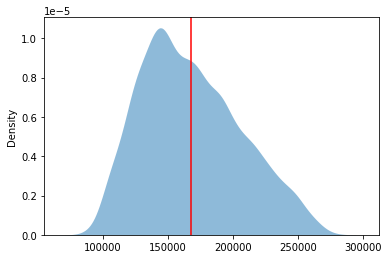

In [ ]:
# distribution of optimal value with 30%
sns.kdeplot(results,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)
plt.axvline(np.mean(results), color='red')
plt.show()

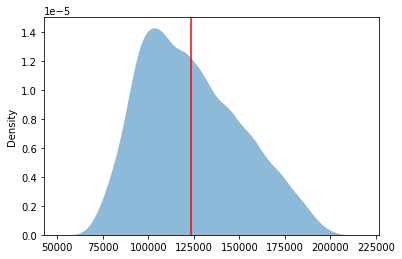

In [ ]:
# distribution of optimal value with 10%
sns.kdeplot(results_2,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)
plt.axvline(np.mean(results_2), color='red')
plt.show()

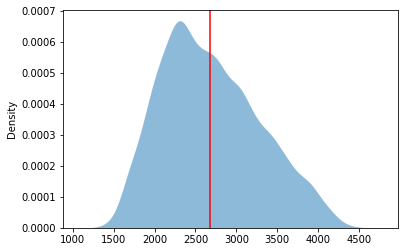

In [ ]:
# distribution of cases quantity with 30%
sns.kdeplot(cases,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)
plt.axvline(np.mean(cases), color='red')
plt.show()

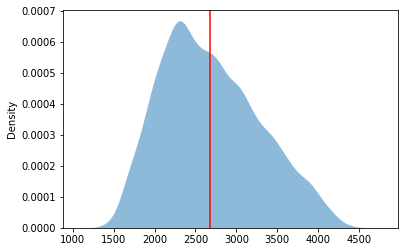

In [ ]:
# distribution of cases quantity with 30%
sns.kdeplot(cases_2,fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)
plt.axvline(np.mean(cases_2), color='red')
plt.show()

## Cumulative Density Plot

From a cumulative distribution plot, it shows the empirical cumulative distribution function of the data. The empirical CDF is the proportion of values less than or equal to X

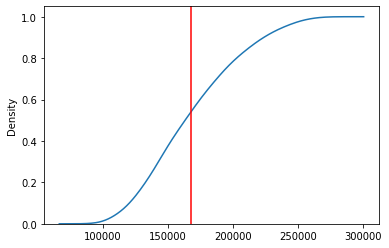

In [ ]:
# here is the distribution of values

sns.kdeplot(results, cumulative = True)
plt.axvline(np.mean(results), color='red')
plt.show()

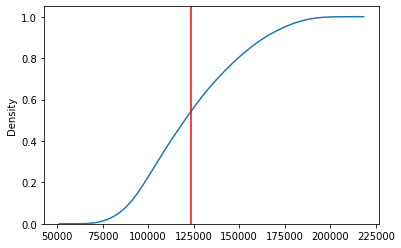

In [ ]:
# here is the distribution of values

sns.kdeplot(results_2, cumulative=True)
plt.axvline(np.mean(results_2), color='red')
plt.show()

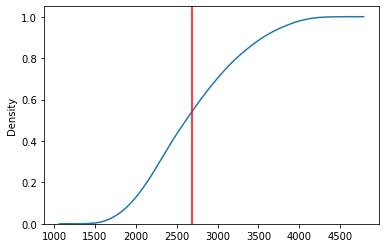

In [ ]:
# here is the distribution of cases with 30%

sns.kdeplot(cases, cumulative= True)
plt.axvline(np.mean(cases), color='red')
plt.show()

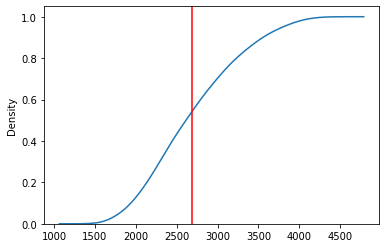

In [ ]:
# here is the distribution of confirmed cases with 10%

sns.kdeplot(cases_2, cumulative=True)
plt.axvline(np.mean(cases_2), color='red')
plt.show()

**Take Away**:

* *Optimal cost daily*:
  
  From the plot we can see, the shape is the same with first Monte Carlo simulation with 30% constraint network model, so called model 1.
However, the whole curve in model 2 move to left which means the cost will be less in model 2.

* *Confirmed case daily*:

  From this plot, we can see the shape is the same and the mean of the two are also similar. All demands change in a triangular distribution, in that case, the difference between two Monte Carlo simulations are really small. Hence, the plot comparison of the confirmed case is useless.

**In 90% confidence that the expected mean will be inside this range for each model**

In [ ]:
# 90% confidence interval for Model 1

a = st.t.interval(alpha=0.90, df=len(results)-1, loc=np.mean(results), scale=st.sem(results))
print(np.round(a,decimals=2))

[167230.88 168492.18]


In [ ]:
# 90% confidence interval for Model 2

b = st.t.interval(alpha=0.90, df=len(results_2)-1, loc=np.mean(results_2), scale=st.sem(results_2))
print(np.round(b,decimals=2))

[123171.63 124082.63]


# Conclusion

Model 1

    [167929.63 169186.94] 

    Difference = $1,257.31

    The government will have to make sure that they have at least $167,929.63 to be 90% sure that the government will cover the shipping expenses.


Model 2

    [123350.47 124265.43] 

    Difference = $914.96

    The government will have to make sure that they have at least $123,350.47 to be 90% sure that they will cover the shipping expenses.

* By comparing the lower bounds of the 90% confidence intervals of the two models, we can save 167,929.63 USD - 123,350.47 USD, which is 44,579.16 USD, considering we have a new assumption that at least 10% vaccine demand needs to be covered by each hospital. 
* Since the model 2 would be a more reasonable choice for us to get the optimal value, we will use the minimum cost from model to allocate. In that case, the govenment should allocate at lease $65876.11 for shipping cost.
* The best fit would be the Hartford Hospital since overall, it is the closest to the assigned county, i.e., Litchfield. This is followed by Yale New Haven Hospital, and then Groton/Lawrence and Memorial Hospital. So, as the shipping cost is directly proportional to the distance between the hospital and town, thus it would be minimum from Hartford Hospital to the Litchfield County.
* There has to be a minimum supply of vaccines to each county to suffice the needs of the surrounding county/areas based on the population of each county.
* There has to be an upper limit to the number of vaccines that a county will receive because it may result in a few counties receiving vaccines more than the demand and other counties may receive less than the actual demand in that location.
* We are aware that the COVID vaccine will have extreme storage conditions, so the shipping cost will be higher than most of the existing vaccines in the country.
* The shipping cost is directly proportional to the distance between the hospital and the destination, so if we receive all the vaccines for the demand of each town from the nearest hospital, it will result in the least amount of shipping cost.
* The modified Model 2 gives us the final cost of 46,216.115 USD, and Model 1 gives a final cost of 63,131.935 USD. So, we were able to reduce the shipping cost by improving the model, i.e., by changing the supply constraint from at least 30% supply from each hospital to at least 10% supply from each hospital.
* In the real world, the virus is spread all across the states of CT, which means the confirmed case will not be limited in Litchfield County. With a perfectly simulated situation, hospitals having an infinite supplement of vaccines can be delivered to the whole state. Under this circumstance, we can save more money by canceling “covering ‘10%’ of total demand”.